In [271]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [272]:
img = cv2.imread('dogo.webp')

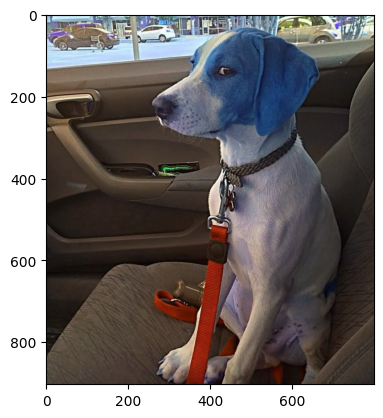

In [273]:
plt.imshow(img)

In [274]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

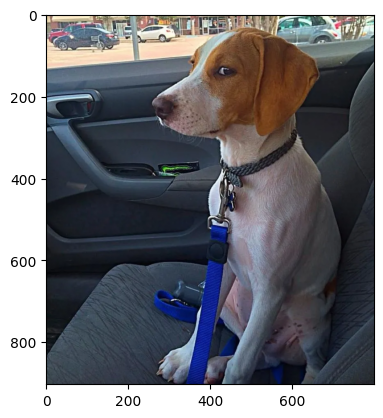

In [275]:
plt.imshow(img_rgb)

In [276]:
print(img_rgb.shape)

(903, 800, 3)


In [277]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


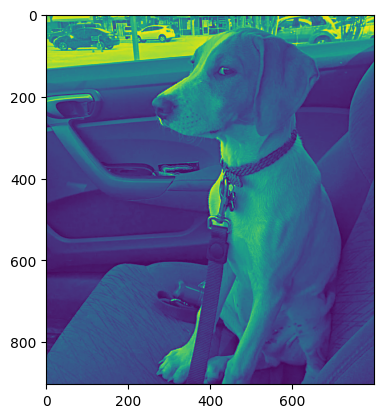

In [278]:
plt.imshow(gray)
plt.show()

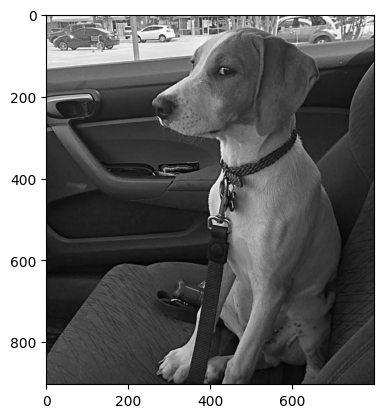

In [279]:
plt.imshow(gray, cmap='gray') 
plt.show()

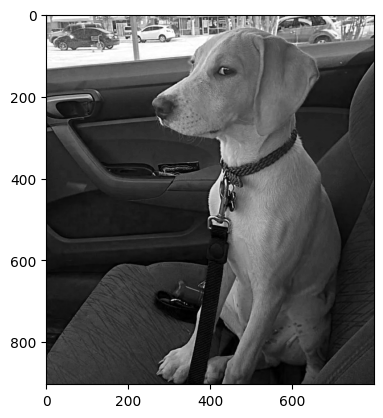

In [280]:
plt.imshow(img_rgb[:,:,0],cmap='gray')
plt.show()

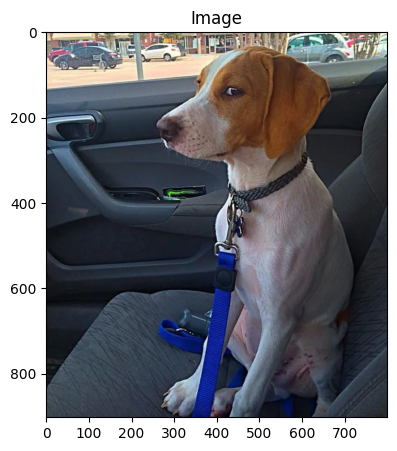

In [281]:
fig = plt.figure(figsize=(5, 5)) 
ax = fig.add_subplot()  
ax.imshow(img_rgb)
ax.set_title("Image")  
plt.show()

In [282]:
resized = cv2.resize(img_rgb, (300, 300))

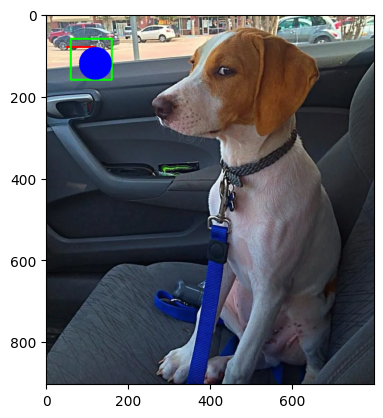

In [283]:
lined_img= img_rgb.copy()
cv2.line(lined_img, (50, 80), (120, 80), (255, 0, 0), 4)
cv2.rectangle(lined_img, (60, 60), (160, 160), (0, 255, 0), 3)
cv2.circle(lined_img, (120, 120), 40, (0, 0, 255), -1)
plt.imshow(lined_img)
plt.show()

### Modify the position of a dog in an image by manipulating its coordinates using NumPy

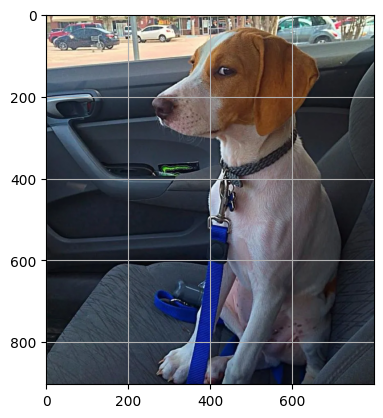

In [284]:
plt.imshow(img_rgb)
plt.grid(True)
plt.show()

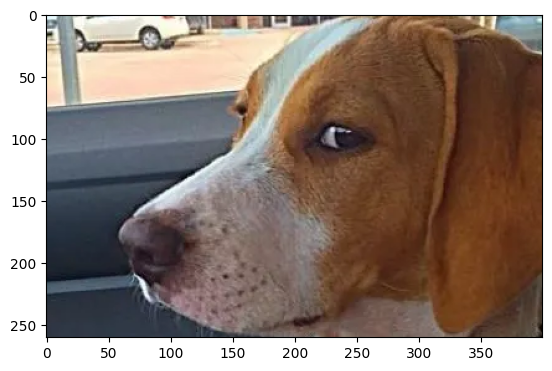

In [285]:
x1, y1 = 200, 40 
x2, y2 = 600,300   

head_img = img_rgb[y1:y2, x1:x2]
plt.imshow(head_img)
plt.show()

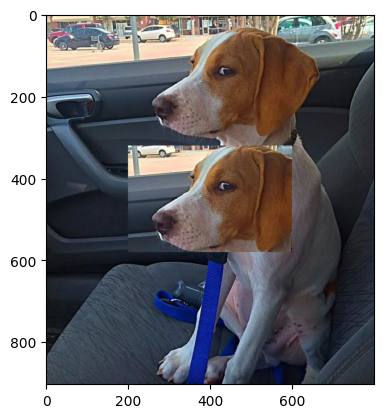

In [286]:

center_x = (img_rgb.shape[1] - (x2 - x1)) // 2
center_y = (img_rgb.shape[0] - (y2 - y1)) // 2

centered_img = img_rgb.copy()

centered_img[center_y:center_y + (y2 - y1), center_x:center_x + (x2 - x1)] = head_img

plt.imshow(centered_img)
plt.show()

### Increase the Brightness

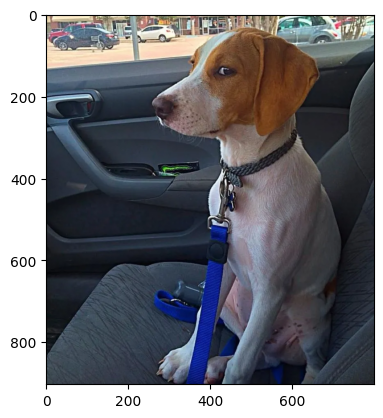

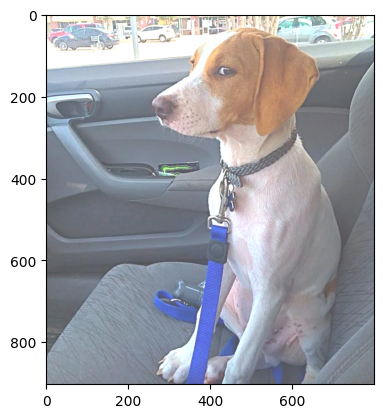

In [287]:
image = img_rgb.copy()
bright_incr = 80

plt.imshow(image)
plt.show()
height = image.shape[0]
width = image.shape[1]
for i in range(height):
    for j in range(width):
        for k in range(3):
            image[i][j][k]=min(image[i][j][k]+bright_incr,255)
plt.imshow(image)

# Inbuilt Function
brightened_image = cv2.add(image, bright_incr)  

### Decrease the Brightness [Contrast]

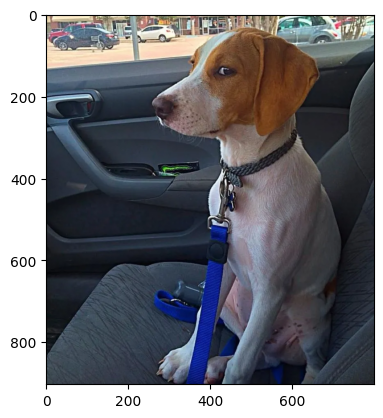

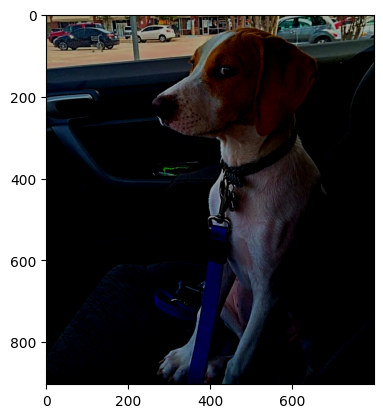

In [288]:
image = img_rgb.copy()
bright_dec = 50

plt.imshow(image)
plt.show()

for i in range(height):
    for j in range(width):
        for k in range(3):
            image[i][j][k]=max(image[i][j][k]-bright_incr,0)
plt.imshow(image)
        
# Inbuilt Function
contrasted_image = cv2.subtract(image, bright_dec) 

### Histogram Equalization

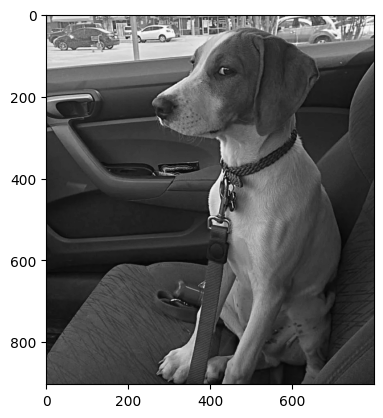

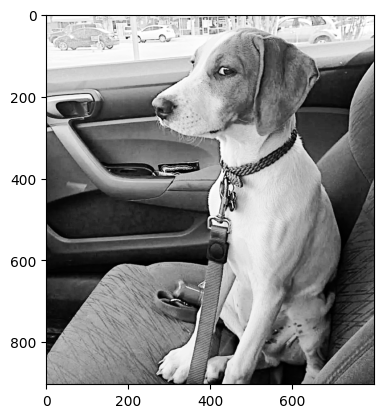

In [289]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

equalized_image = cv2.equalizeHist(gray)
plt.imshow(equalized_image,cmap='gray')
plt.show()

### Simple Blur

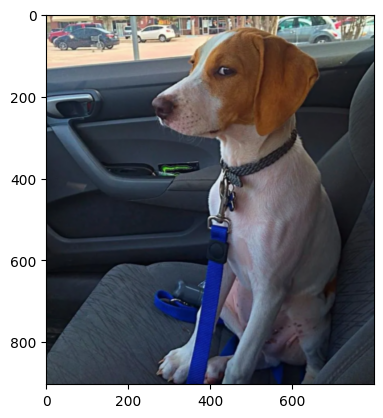

In [290]:

image =img_rgb.copy()
for i in range(1,height-1):
    for j in range(1,width-1):
        for k in range(3):
            image[i][j][k]=np.average(image[i-1:i+2,j-1:j+2,k])
plt.imshow(image)

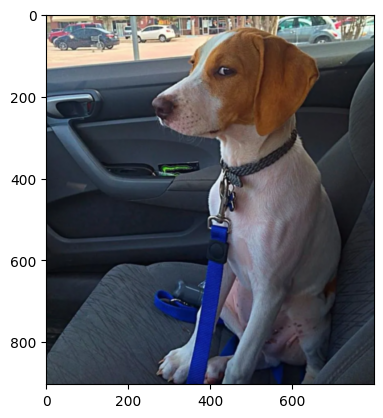

In [291]:
simple_blur = cv2.blur(img_rgb,(3,3))
plt.imshow(simple_blur)

# GaussianBlur

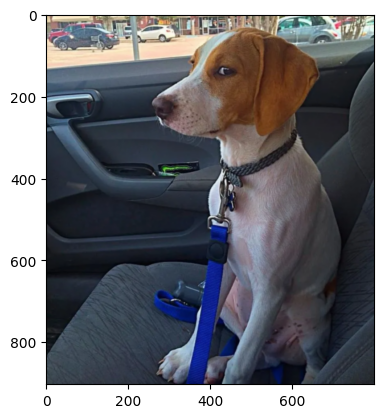

In [292]:
# GaussianBlur Filter without library function
arr = np.array([[1,2,1],[2,4,2],[1,2,1]])
arr = arr / arr.sum()
image =img_rgb.copy()

for i in range(1, height-1):
    for j in range(1, width-1):
        for k in range(3):  
            region = image[i-1:i+2, j-1:j+2, k]
            image[i, j, k] = np.sum(region * arr)

plt.imshow(image)

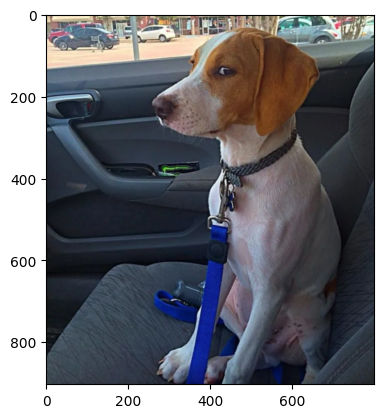

In [293]:
# GaussianBlur Filter with library function
image = img_rgb.copy()
gb=cv2.GaussianBlur(image,(3,3),0)
plt.imshow(gb)

### Sharpening

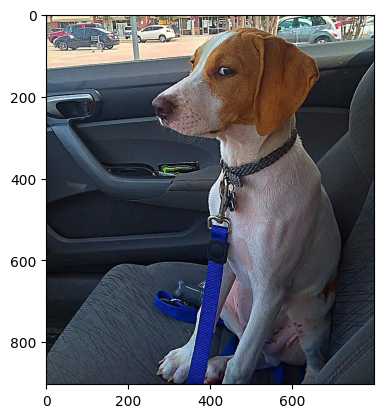

In [294]:
sharpen = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(img_rgb, -1, sharpen)
plt.imshow(sharpened)
plt.show()

### Edge Detection 

##### 1.Vertical Edges

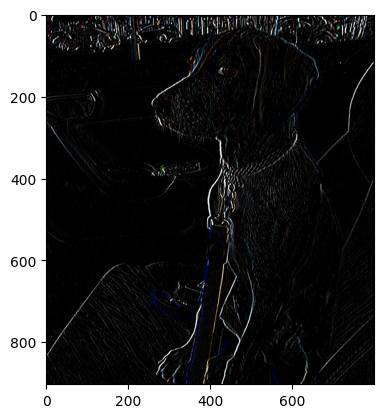

In [295]:
ver_kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

ver_edg = cv2.filter2D(img_rgb, ddepth=-1, kernel=ver_kernel)
plt.imshow(ver_edg)


##### 2.Horizontal Edges

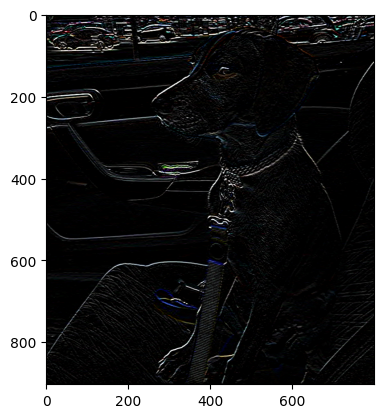

In [296]:
hor_kernel = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])

hor_edg = cv2.filter2D(img_rgb, ddepth=-1, kernel=hor_kernel)
plt.imshow(hor_edg)

### Take 2 images 1st - dog , 2nd - horse  and generate two new images having dog contains horse head and vice versa

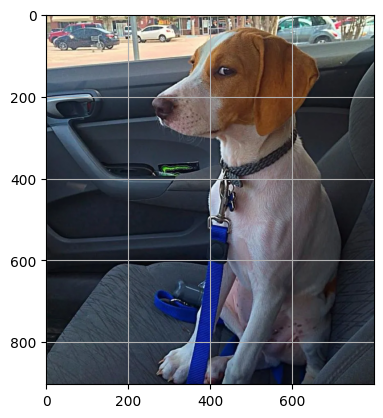

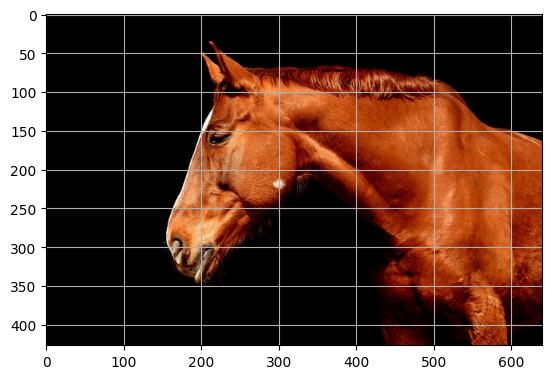

In [297]:
dogo =cv2.imread('dogo.webp')
horse = cv2.imread('horse.jpg')
dogo = cv2.cvtColor(dogo, cv2.COLOR_BGR2RGB)
horse = cv2.cvtColor(horse, cv2.COLOR_BGR2RGB)
plt.imshow(dogo)
plt.grid(True)
plt.show()


plt.imshow(horse)
plt.grid(True)
plt.show()

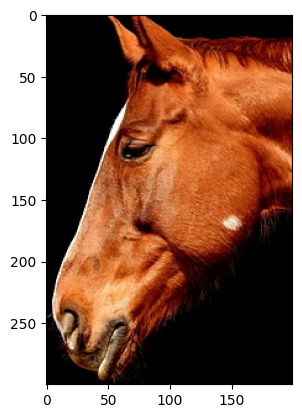

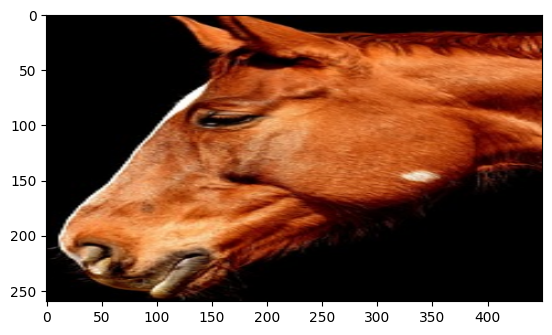

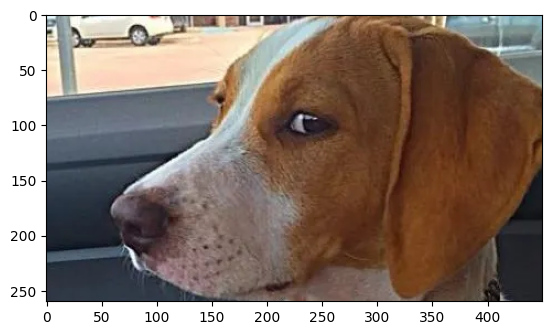

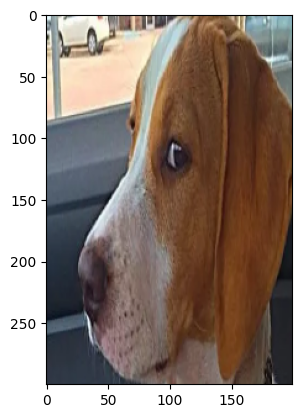

In [298]:
x1, y1 = 200, 40 
x2, y2 = 650, 300  
dogo_face = dogo[y1:y2, x1:x2]
horse_face = horse[50:350, 150:350] 

# Resize dog face to the size of horse face
dogo_face_resized = cv2.resize(dogo_face, (horse_face.shape[1], horse_face.shape[0]))
horse_face_resized = cv2.resize(horse_face, (dogo_face.shape[1], dogo_face.shape[0]))

plt.imshow(horse_face)
plt.show()
plt.imshow(horse_face_resized)
plt.show()
plt.imshow(dogo_face)
plt.show()
plt.imshow(dogo_face_resized)
plt.show()



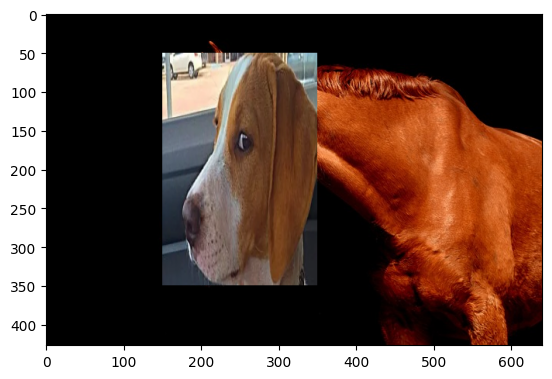

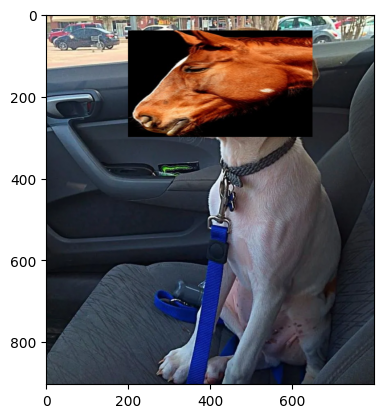

In [300]:

horse[50:350, 150:350] =dogo_face_resized
dogo[y1:y2, x1:x2] = horse_face_resized
plt.imshow(horse)
plt.show()
plt.imshow(dogo)